In [52]:
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3dexp.db

In [53]:
dataset = 'jpeg/flickr50k'
num_workers=4
hostname='cloudlet029'

df = pd.read_sql(
    'SELECT expname, basedir, avg_wall_ms, (1 / avg_wall_ms * 1000) as throughput FROM EurekaExp \
        WHERE basedir LIKE %s ORDER BY expname',
    s3dexp.db.engine,
    params=["%{}%".format(dataset)])

df

,expname,basedir,avg_wall_ms,throughput
0,baseline_decode-sorted,/mnt/hdd/fast20/jpeg/flickr50k,1.752594,570.582797
1,baseline_face,/mnt/hdd/fast20/jpeg/flickr50k,135.368888,7.387222
2,baseline_face-sorted,/mnt/hdd/fast20/jpeg/flickr50k,134.881285,7.413927
3,baseline_hash,/mnt/hdd/fast20/jpeg/flickr50k,5.290392,189.021905
4,baseline_hash-sorted,/mnt/hdd/fast20/jpeg/flickr50k,2.949894,338.995280
5,baseline_read-sorted,/mnt/hdd/fast20/jpeg/flickr50k,0.720948,1387.061950
6,baseline_redbus-sorted,/mnt/hdd/fast20/jpeg/flickr50k,2.653801,376.817983
7,baseline_redness,/mnt/hdd/fast20/jpeg/flickr50k,5.406787,184.952726
8,baseline_redness-sorted,/mnt/hdd/fast20/jpeg/flickr50k,3.111496,321.388860
9,smart_decode-sorted,/mnt/hdd/fast20/jpeg/flickr50k,0.945874,1057.223062


In [54]:
def find(expname):
    return df[df['expname'] == expname]['throughput'].item()

def throughputs(expname):
    return (find(expname + '_redness'), find(expname + '_hash'), find(expname + '_face'))

def throughputs_sorted(expname):
    return (find(expname + '_redness-sorted'), find(expname + '_hash-sorted'), find(expname + '_face-sorted'))

<IPython.core.display.Javascript object>


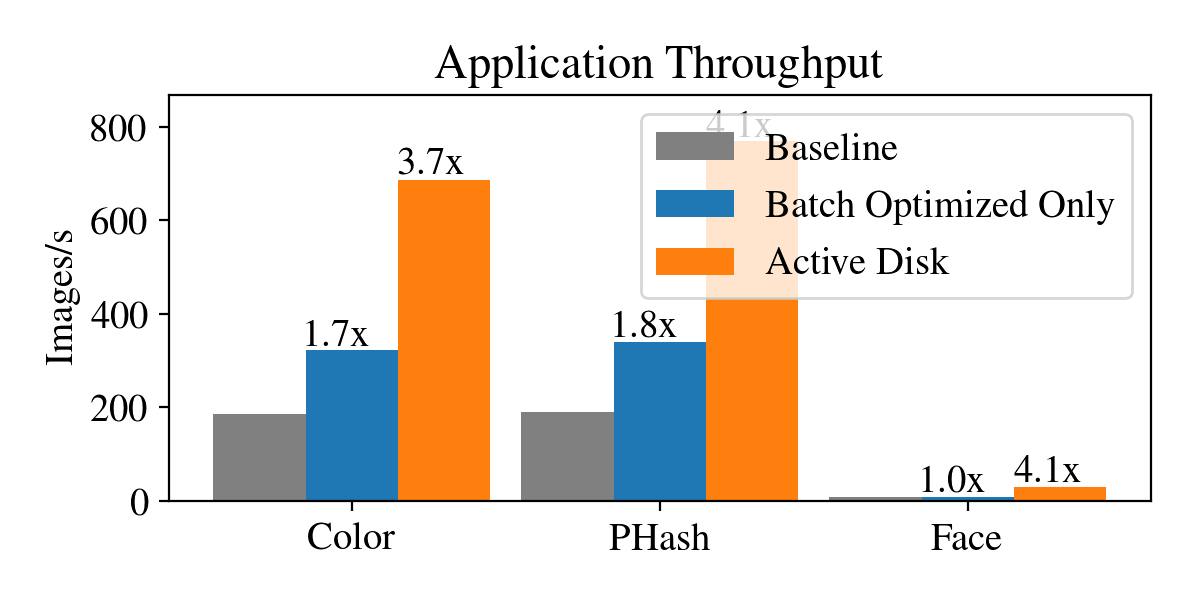

In [97]:
%matplotlib notebook

plt.figure(figsize=(6,3))

tput_baseline = throughputs('baseline')
tput_baseline_sorted = throughputs_sorted('baseline')
tput_smart = throughputs_sorted('smart')

ind = np.arange(3)
width = 0.3       

# baseline
plt.bar(ind, tput_baseline, width, label='Baseline', color='gray')

# batch optmized (baseline+sorted)
plt.bar(ind + width, tput_baseline_sorted, width, label='Batch Optimized Only')

for x,y,s in zip(ind, tput_baseline_sorted, np.divide(tput_baseline_sorted, tput_baseline)):
    plt.annotate("{:.1f}x".format(s), (x + .5*width,y+10))

# smart
plt.bar(ind + width * 2, tput_smart, width, label='Active Disk')

for x,y,s in zip(ind, tput_smart, np.divide(tput_smart, tput_baseline)):
    plt.annotate("{:.1f}x".format(s), (x + 1.5*width, y + 10))
    

plt.ylabel('Images/s')
plt.ylim(None, np.max(tput_smart)+100)
plt.title('Application Throughput')

plt.xticks(ind + width, ('Color', 'PHash', 'Face'))
# plt.legend(bbox_to_anchor=(1, 1), loc='middle right')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('application-throughput.pdf', bbox_inches ='tight')

plt.show()